In [179]:
%matplotlib inline
import matplotlib.pyplot as plt #http://matplotlib.org/users/pyplot_tutorial.html
import numpy as np

In [180]:
# calculate coefficients
dataset = [[1, 1], [2, 3], [4, 3], [3, 2], [5, 5]] 

In [181]:
from itertools import chain

In [182]:
x = list(item[0] for item in dataset)
y = list(item[1] for item in dataset)

print(x)
print(y)

[1, 2, 4, 3, 5]
[1, 3, 3, 2, 5]


In [183]:
# Example of Calculating Coefficients
# Calculate the mean value of a list of numbers
def mean(values):
  return sum(values) / float(len(values))
# Calculate covariance between x and y
def covariance(x, mean_x, y, mean_y):
  covar = 0.0
  for i in range(len(x)):
    covar += (x[i] - mean_x) * (y[i] - mean_y)
  return covar
# Calculate the variance of a list of numbers
def variance(values, mean):
  return sum([(x-mean)**2 for x in values])
# Calculate coefficients
def coefficients(dataset):
  x = [row[0] for row in dataset]
  y = [row[1] for row in dataset]
  x_mean, y_mean = mean(x), mean(y)
  b1 = covariance(x, x_mean, y, y_mean) / variance(x, x_mean)
  b0 = y_mean - b1 * x_mean
  return [b0, b1]

#b0 is the intercept
b0, b1 = coefficients(dataset) 
print('Coefficients: B0=%.3f, B1=%.3f' % (b0, b1)) 


Coefficients: B0=0.400, B1=0.800


In [184]:
#http://radek.io/2011/07/21/private-protected-and-public-in-python/
import numpy as np
class SimpleLinearRegression:    
    def train(self, x, y):        
        self.x = np.array(x)
        self.y = np.array(y)
        self.x_mean = self.x.mean()
        self.y_mean = self.y.mean()
        self.__set_slope()
        self.__set_intercept()
    
    def __set_slope(self):
        numerator = 0
        for i in range(len(self.x)):
            numerator += ((self.x[i] - self.x_mean) * (self.y[i] - self.y_mean))

        denominator = 0
        for i in range(len(self.x)):
            denominator += ((self.x[i] - self.x_mean) ** 2)

        self.__slope = numerator / denominator
        
    def __set_intercept(self):
        self.__intercept = self.y_mean - (self.__slope * self.x_mean)
        
    def __predict(self, x):
        return (self.__slope * x) + self.__intercept
    
    def predict(self, x):
        return [self.__predict(value) for value in np.array(x)]        
    
    def rmse(self, predicted_y, actual_y):
        import math        
        N = len(predicted_y)
        sum_squared_error = 0
        for i in range(N):
            sum_squared_error += ((predicted_y[i] - actual_y[i]) **2)
        
        return (math.sqrt(sum_squared_error / N))    
    
    def get_slope(self):        
        return self.__slope
        
    def get_intercept(self):
        return self.__intercept

In [185]:
t = SimpleLinearRegression()
t.train(x,y)

In [186]:
sl = t.get_slope()

In [187]:
inter = t.get_intercept()

In [188]:
print('Coefficients: Slope = %.3f, Intercept = %.3f' % (sl, inter)) 

Coefficients: Slope = 0.800, Intercept = 0.400


In [189]:
print(x)
print(y)

[1, 2, 4, 3, 5]
[1, 3, 3, 2, 5]


2 and 3


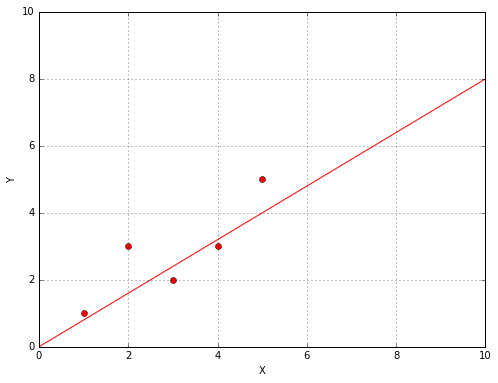

[  0.           0.1010101    0.2020202    0.3030303    0.4040404
   0.50505051   0.60606061   0.70707071   0.80808081   0.90909091
   1.01010101   1.11111111   1.21212121   1.31313131   1.41414141
   1.51515152   1.61616162   1.71717172   1.81818182   1.91919192
   2.02020202   2.12121212   2.22222222   2.32323232   2.42424242
   2.52525253   2.62626263   2.72727273   2.82828283   2.92929293
   3.03030303   3.13131313   3.23232323   3.33333333   3.43434343
   3.53535354   3.63636364   3.73737374   3.83838384   3.93939394
   4.04040404   4.14141414   4.24242424   4.34343434   4.44444444
   4.54545455   4.64646465   4.74747475   4.84848485   4.94949495
   5.05050505   5.15151515   5.25252525   5.35353535   5.45454545
   5.55555556   5.65656566   5.75757576   5.85858586   5.95959596
   6.06060606   6.16161616   6.26262626   6.36363636   6.46464646
   6.56565657   6.66666667   6.76767677   6.86868687   6.96969697
   7.07070707   7.17171717   7.27272727   7.37373737   7.47474747
   7.575757

In [190]:
plt.subplots(figsize=(8, 6))

yvals = np.arange(0, 10, 0.01)
xvals = np.arange(0, 10, 0.01)
#plt.plot(xvals, yvals)

x_0 = 0
y_0 = 0

x_1 = 5000
#y_1 = sl * x_1 + inter #sl * (x_1 - x_0) + y_0
y_1 = sl * (x_1 - x_0) + y_0

# [x_0, x_1], [y_0, y_1]
plt.plot([x_0, x_1], [y_0, y_1], c='r') 


line_x = np.linspace(0, 10, 100)
#plt.plot(line_x + 2, 1.3 * line_x, linestyle='-')
#plt.plot([0,0], [10,10], c='r')    

print(str(x[1]) + ' and ' + str(y[1]))

plt.plot(x, y, 'ro', label='Class 0')
#plt.plot(df[5:]['x1'], df[5:]['x2'], 'bo', label='Class 1')
#plt.legend(loc='upper center', frameon=True)
#leg = plt.legend();
plt.ylabel('Y')
plt.xlabel('X')
plt.axis([0, 10, 0, 10])
plt.grid(True)
plt.show()
print(line_x)

In [191]:
t.predict([10])

[8.3999999999999986]

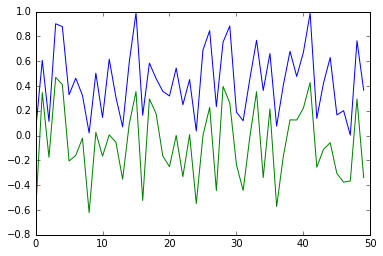

In [192]:
import random

def noisy_line(m, b, x):
    return m * x + b + 0.5 * (random.random() - 0.5)

slope = 1.0
intercept = -0.5
x_coords = [random.random() for t in range(50)]
y_coords = [noisy_line(slope, intercept, x) for x in x_coords]
sp = plt.plot(zip(x_coords, y_coords))
#sp += line([(0.0, intercept), (1.0, slope+intercept)], color='red')
#sp.show()

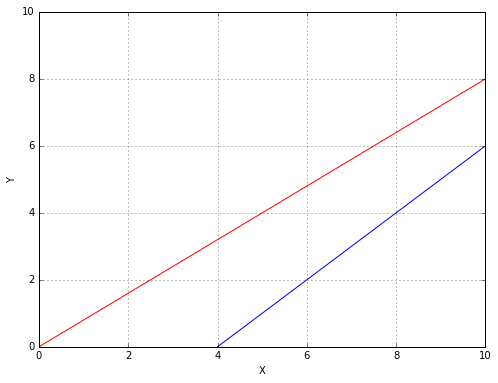

In [193]:
plt.subplots(figsize=(8, 6))

yvals = np.arange(0, 10, 0.01)
xvals = np.arange(0, 10, 0.01)
#plt.plot(xvals, yvals)

x_0 = 0
y_0 = 0

x_1 = 5000
#y_1 = sl * x_1 + inter #sl * (x_1 - x_0) + y_0
y_1 = sl * (x_1 - x_0) + y_0

# [x_0, x_1], [y_0, y_1]
plt.plot([x_0, x_1], [y_0, y_1], c='r') 

x0 = 4
y0 = 10
x1 = 0
y1 = 6
plt.plot([x0, y0], [x1, y1], c='b') 


#line_x = np.linspace(0, 10, 100)
#plt.plot(line_x + 2, 1.3 * line_x, linestyle='-')
#plt.plot([0,0], [10,10], c='r')    

#print(str(x[1]) + ' and ' + str(y[1]))

#plt.plot(x, y, 'ro', label='Class 0')
#plt.plot(df[5:]['x1'], df[5:]['x2'], 'bo', label='Class 1')
#plt.legend(loc='upper center', frameon=True)
#leg = plt.legend();
plt.ylabel('Y')
plt.xlabel('X')
plt.axis([0, 10, 0, 10])
plt.grid(True)
plt.show()
#print(line_x)

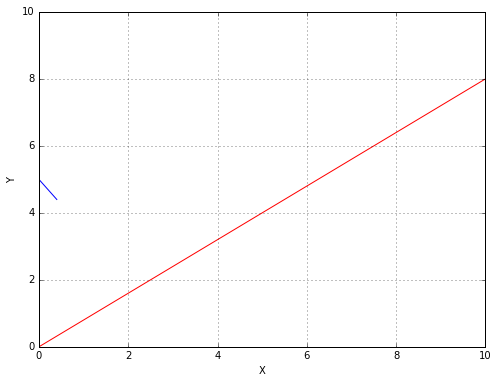

In [194]:
plt.subplots(figsize=(8, 6))

yvals = np.arange(0, 10, 0.01)
xvals = np.arange(0, 10, 0.01)
#plt.plot(xvals, yvals)

x_0 = 0
y_0 = 0

x_1 = 5000
#y_1 = sl * x_1 + inter #sl * (x_1 - x_0) + y_0
y_1 = sl * (x_1 - x_0) + y_0

# [x_0, x_1], [y_0, y_1]
plt.plot([x_0, x_1], [y_0, y_1], c='r') 


#when x = 0, 
x0 = 0
y0 = inter
x1 = 5
y1 = (sl * x1) + inter
plt.plot([x0, y0], [x1, y1], c='b') 


#line_x = np.linspace(0, 10, 100)
#plt.plot(line_x + 2, 1.3 * line_x, linestyle='-')
#plt.plot([0,0], [10,10], c='r')    

#print(str(x[1]) + ' and ' + str(y[1]))

#plt.plot(x, y, 'ro', label='Class 0')
#plt.plot(df[5:]['x1'], df[5:]['x2'], 'bo', label='Class 1')
#plt.legend(loc='upper center', frameon=True)
#leg = plt.legend();
plt.ylabel('Y')
plt.xlabel('X')
plt.axis([0, 10, 0, 10])
plt.grid(True)
plt.show()
#print(line_x)